#**SENTIMENT ANALYSIS OF TWEETS USING VARIOUS MACHINE LEARNING TECHNIQUES**

Sentiment Analysis, or Emotion AI is a natural language processing (NLP) approach that involves determining the sentiment or emotional tone expressed in a piece of text.

The objective is to categorize text in an automatic manner according to positive, negative, neutral, or occasionally more complex emotional states like joy, sadness, anger, or surprise.

**Importing the libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
from sklearn.metrics import classification_report

import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Reading data from a CSV file**

In [ ]:
train=pd.read_csv('twitter_training.csv')
val = pd.read_csv('twitter_validation.csv')

In [ ]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
53821,2048,CallOfDuty,Negative,@ CfDuty fix their game new omg challenge with...
53822,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge re...
53823,2048,CallOfDuty,Negative,Dear @CallofDuty fix your stupid game new omg ...
53824,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge cu...


In [ ]:
val_data=val
val_data

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


**Performing Exploratory Data Analysis**

In [ ]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

The above-mentioned code takes text data from the "text" columns of the train_data and val_data DataFrames,then converts the text to lowercase, and at last applies a regular expression to remove all characters that are not letters, digits, or spaces, effectively cleaning the text for further processing.

In [ ]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


**Generating a word cloud of the most frequent words in the sentiment text data and displaying it**

WordCloud is a library used to create visual representations of text data, where each word's size in the visualisation corresponds to how frequently it appears in the text.

In the following code, we created a word cloud visualization from the "lower" text data of positive,negative,irrelevant and neutral class instances in the train_data DataFrame. The resulting word cloud displays the most frequent words in the positive class's text data, where word size are in tune with the word frequency.




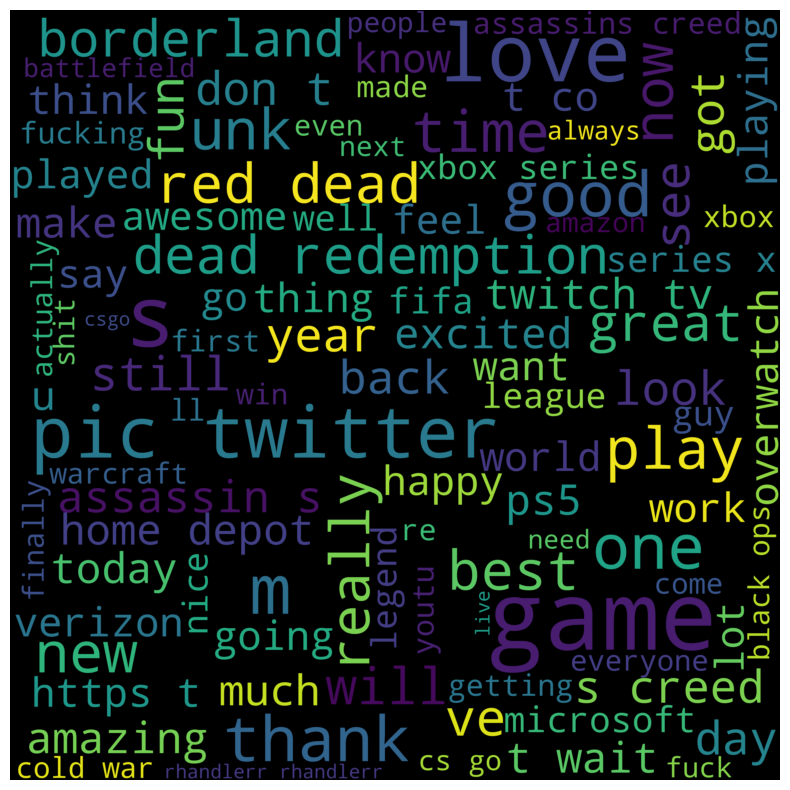

In [ ]:
#For positive sentiments
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

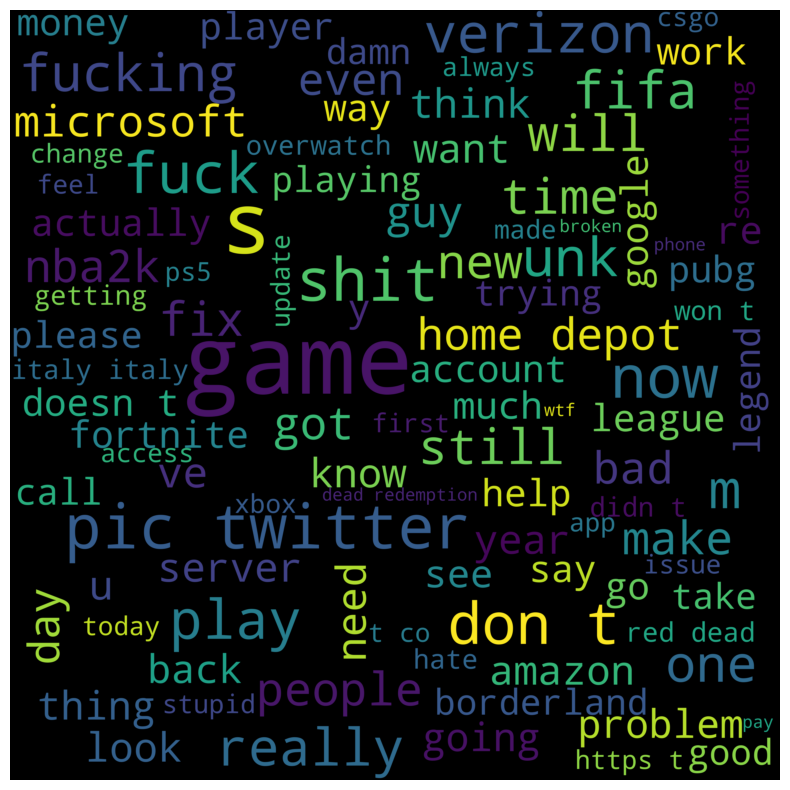

In [ ]:
#For Negative sentiments
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

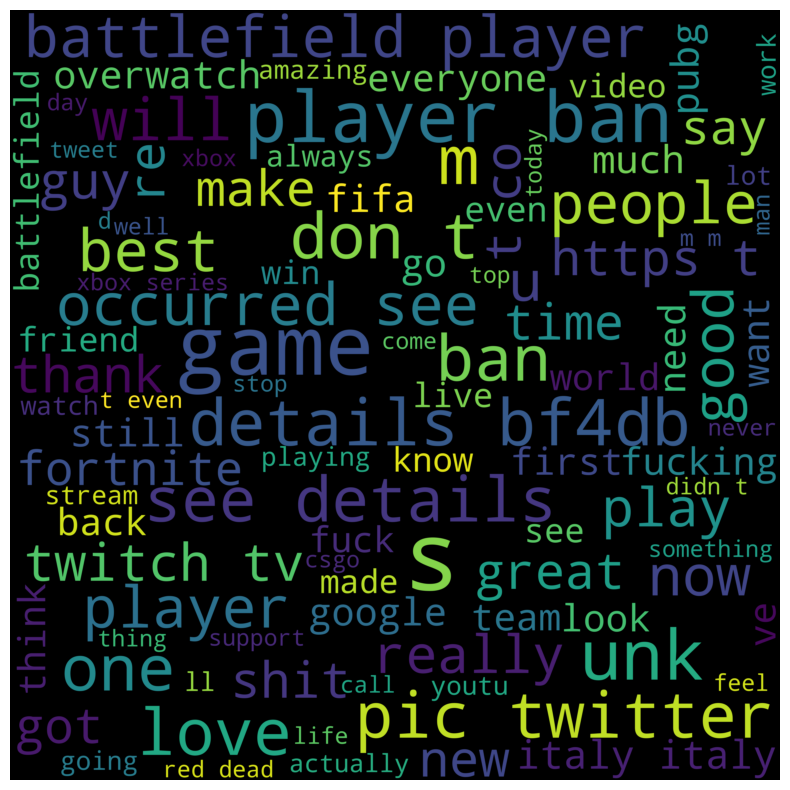

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

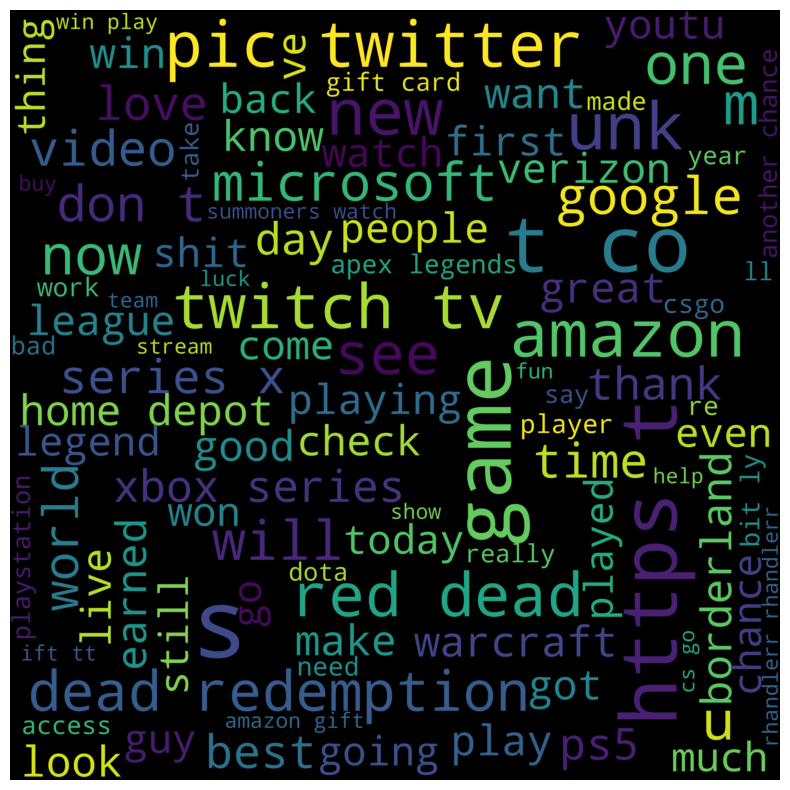

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


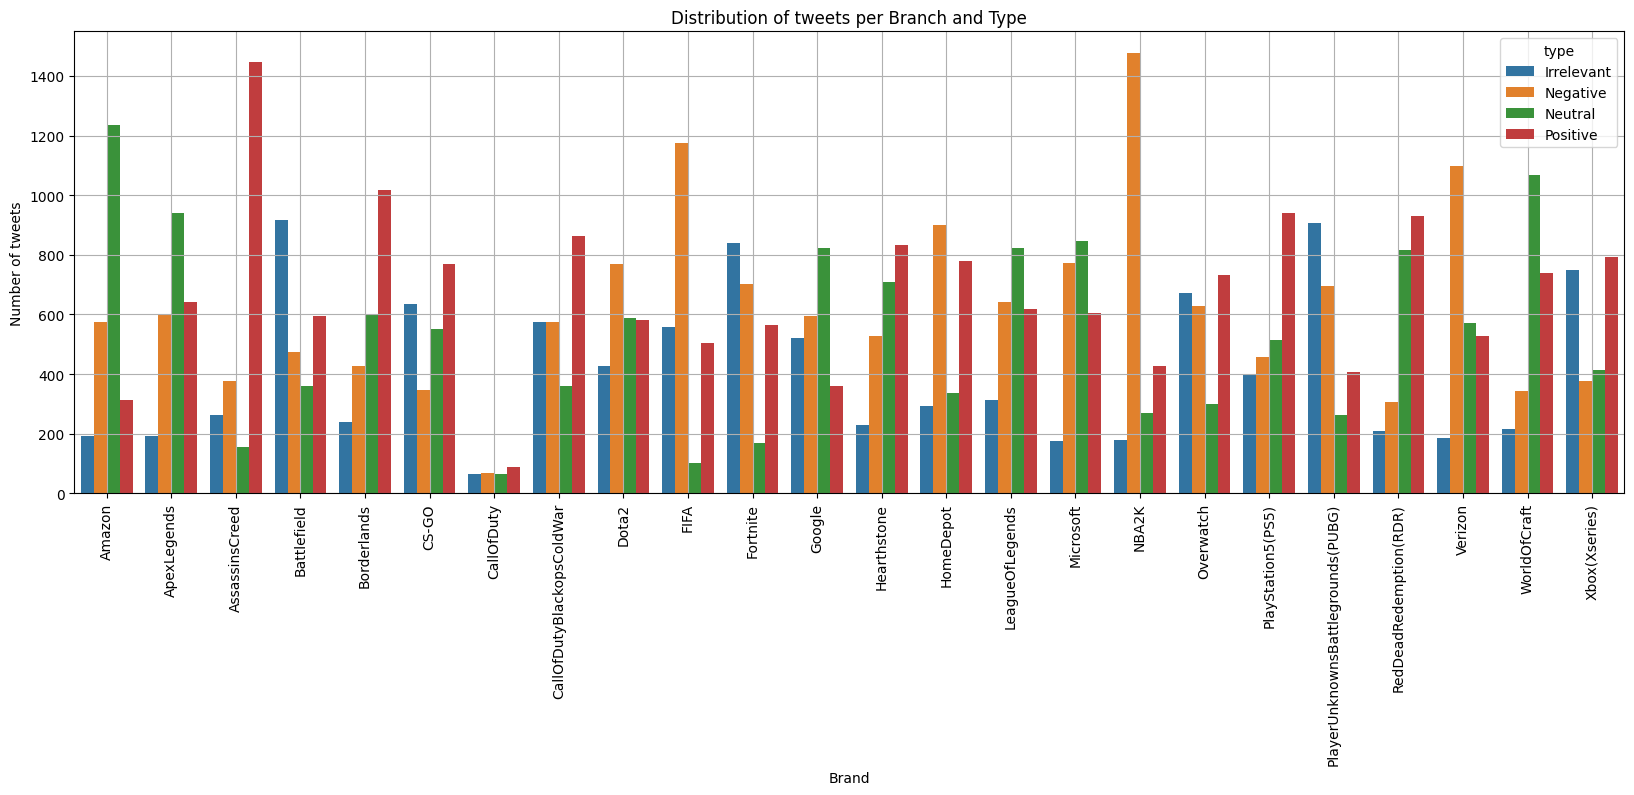

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

NLTK is a widely used library for working with human language data, such as text analysis, tokenization, and more.The 'punkt' resource includes pre-trained models and data for tokenization, particularly for sentence and word tokenization. The 'punkt' resource is required by the word_tokenize function to tokenize text into words.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

Lowercase Conversion

In [ ]:
# Convert text to lowercase
train_data['text'] = train_data['text'].str.lower()
val_data['text'] = val_data['text'].str.lower()


Tokenization

In [ ]:
# Fill NaN values with empty string and convert to string
train_data['text'] = train_data['text'].fillna('').astype(str)
val_data['text'] = val_data['text'].fillna('').astype(str)

# Now tokenize
train_data['tokens'] = train_data['text'].apply(lambda x: x.split())
val_data['tokens'] = val_data['text'].apply(lambda x: x.split())


Stopword Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

train_data['tokens'] = train_data['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)
val_data['tokens'] = val_data['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

train_data['tokens'] = train_data['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)
val_data['tokens'] = val_data['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Join Tokens Back to String

In [ ]:
train_data['clean_text'] = train_data['tokens'].apply(lambda tokens: ' '.join(tokens))
val_data['clean_text'] = val_data['tokens'].apply(lambda tokens: ' '.join(tokens))


Text Vectorization using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train = vectorizer.fit_transform(train_data['clean_text'])
X_val = vectorizer.transform(val_data['clean_text'])


In [ ]:
y_train = train_data['type']
y_val = val_data['type']


# **Model 1 - LOGISTIC REGRESSION**

- Logistic Regression is a statistical model used for
classification.
- During training, the model adjusts the weights to minimize the difference between the predicted probabilities and the actual class labels in the training data.
- Logistic Regression assumes a linear relationship between features and log-odds of the positive class.

In [ ]:
lr = LogisticRegression(C=5, solver="liblinear",max_iter=500)
# Logistic regression
lr.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=500, solver='liblinear')

In [ ]:
# Prediction
val_pred_1 = lr.predict(X_val)
accuracy1 = accuracy_score(y_val, val_pred_1) * 100
print("Logistic Regression Accuracy: ", accuracy1)

Logistic Regression Accuracy:  90.990990990991


In [ ]:
class_report1 = classification_report(y_val, val_pred_1)

print("Classification Report:\n", class_report1)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.91      0.89      0.90       171
    Negative       0.90      0.95      0.93       266
     Neutral       0.95      0.88      0.91       285
    Positive       0.88      0.91      0.89       277

    accuracy                           0.91       999
   macro avg       0.91      0.91      0.91       999
weighted avg       0.91      0.91      0.91       999



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred_1))

Confusion Matrix:
 [[153   6   4   8]
 [  0 254   2  10]
 [  6  13 251  15]
 [ 10   8   8 251]]


# **Model 2 - XGBoost**

- XGBoost, short for Extreme Gradient Boosting, is a powerful and popular machine learning algorithm that belongs to the family of boosting methods.
- It combines gradient boosting and optimization techniques to create robust predictive models.
- It's widely used for a variety of machine learning tasks, including classification, regression, and ranking problems.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Encode string labels to numbers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# Step 2: Train XGBoost with encoded labels
XGB = XGBClassifier(
    objective="multi:softmax",
    n_estimators=300,
    colsample_bytree=0.9,
    subsample=0.9,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
XGB.fit(X_train, y_train_enc)

# Step 3: Predict and decode if needed
y_pred_xgb = XGB.predict(X_val)
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Step 4: Evaluation
accuracy_xgb = accuracy_score(y_val_enc, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb * 100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 78.67867867867868


In [ ]:
print("Classification Report:\n", classification_report(y_val_enc, y_pred_xgb, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.72      0.70      0.71       171
    Negative       0.82      0.79      0.80       266
     Neutral       0.83      0.77      0.80       285
    Positive       0.76      0.86      0.81       277

    accuracy                           0.79       999
   macro avg       0.78      0.78      0.78       999
weighted avg       0.79      0.79      0.79       999



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val_enc, y_pred_xgb))

Confusion Matrix:
 [[119  13  13  26]
 [ 15 210  18  23]
 [ 17  22 219  27]
 [ 14  11  14 238]]


# **Model 3 - Random Forest**

- It combines the strengths of multiple decision trees to make accurate predictions.
- It's particularly effective for classification and regression tasks.
- For classification, the final prediction is determined by a majority vote among the decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=None,          # You can set a value to prevent overfitting
    random_state=42,
    n_jobs=-1                # Use all cores for faster training
)
rf_model.fit(X_train, y_train_enc)

# Step 2: Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# Step 3: Evaluation
accuracy_rf = accuracy_score(y_val_enc, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf * 100)


Random Forest Accuracy: 81.98198198198197


In [ ]:
print("Classification Report:\n", classification_report(y_val_enc, y_pred_rf, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.81      0.71      0.76       171
    Negative       0.81      0.83      0.82       266
     Neutral       0.83      0.82      0.83       285
    Positive       0.82      0.87      0.84       277

    accuracy                           0.82       999
   macro avg       0.82      0.81      0.81       999
weighted avg       0.82      0.82      0.82       999



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val_enc, y_pred_rf))

Confusion Matrix:
 [[121  15  16  19]
 [ 13 222  15  16]
 [  9  23 235  18]
 [  6  13  17 241]]


# **Model 4 - Support Vector Machine**

- Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks.
- SVM aims to find a hyperplane that best separates the data into different classes.
- SVM can use kernel functions to transform the input features into a higher-dimensional space where linear separation is possible.
- Support vectors are the data points that are closest to the decision boundary, and they play a crucial role in determining the optimal hyperplane.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize SVM classifier
svm_model = SVC(
    kernel='linear',   # Linear kernel is often good for text data
    probability=True,  # Enables probability estimates (optional)
    random_state=42
)

# Step 2: Train the model
svm_model.fit(X_train, y_train_enc)

# Step 3: Predict on validation data
y_pred_svm = svm_model.predict(X_val)

# Step 4: Evaluation
print("SVM Accuracy:", accuracy_score(y_val_enc, y_pred_svm) * 100)


SVM Accuracy: 78.57857857857859


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val_enc, y_pred_svm))

Confusion Matrix:
 [[134   8   5  24]
 [ 20 216  13  17]
 [ 28  20 213  24]
 [ 22  20  13 222]]


In [ ]:
print("Classification Report:\n", classification_report(y_val_enc, y_pred_svm, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.66      0.78      0.71       171
    Negative       0.82      0.81      0.82       266
     Neutral       0.87      0.75      0.81       285
    Positive       0.77      0.80      0.79       277

    accuracy                           0.79       999
   macro avg       0.78      0.79      0.78       999
weighted avg       0.79      0.79      0.79       999



# **Model 5 - Naive Bayes**

- Multinomial Naive Bayes is a variant of the Naive Bayes algorithm specifically designed for text classification tasks.
- It assumes that features represent the frequencies of words or tokens in a document, making it suitable for dealing with text data.
- This algorithm is commonly used in tasks like sentiment analysis, spam detection, and topic classification.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train_enc)

# Predict on validation set
y_pred_nb = nb_model.predict(X_val)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_val_enc, y_pred_nb) * 100)


Naive Bayes Accuracy: 71.27127127127127


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val_enc, y_pred_nb))

Confusion Matrix:
 [[ 89  23  14  45]
 [  7 214  19  26]
 [ 16  39 180  50]
 [ 10  21  17 229]]


In [ ]:
print("Classification Report:\n", classification_report(y_val_enc, y_pred_nb, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.73      0.52      0.61       171
    Negative       0.72      0.80      0.76       266
     Neutral       0.78      0.63      0.70       285
    Positive       0.65      0.83      0.73       277

    accuracy                           0.71       999
   macro avg       0.72      0.70      0.70       999
weighted avg       0.72      0.71      0.71       999

